**Name : Aishwarya Bhavsar** <br>
**CSULB : 029371509**<br>
**CECS 457 - Applied Machine Learning**<br>
**SVM**

# **Import Libraries**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# **Import dataset**

In [32]:
social_data = pd.read_csv('/content/Social_Network_Ads.csv')

# **Check the data types and numbers of rows and columns**

In [33]:
social_data.info

<bound method DataFrame.info of      Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]>

In [34]:
social_data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [35]:
social_data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# **Check missing values**

In [36]:
social_data.isna().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

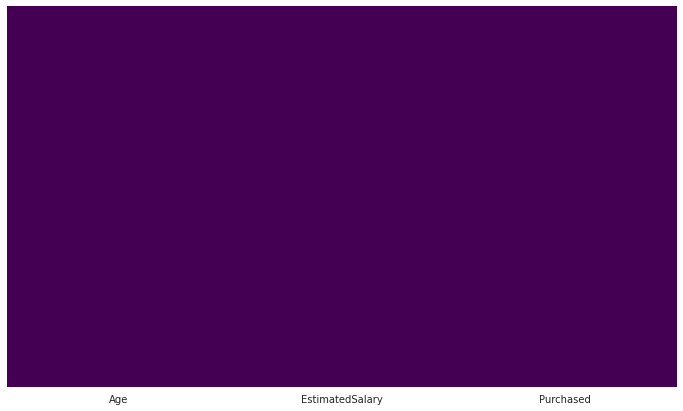

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(social_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# **Create X array & Y array**

In [37]:
X = social_data.iloc[:, [0, 1]].values
y = social_data.iloc[:, 2].values

# **Splitting the dataset into the Training set and Test set**

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# **Check the length of test and train dataset**

In [39]:
print("Training Set of X:", len(X_train))
print("Testing Set of X:", len(X_test))
print("Training Set of y:", len(y_train))
print("Testing Set of y:", len(y_test))

Training Set of X: 300
Testing Set of X: 100
Training Set of y: 300
Testing Set of y: 100


# **Feature Scaling**

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Fitting the model**

In [41]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state= 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

# **Predicting the Test set results**

In [42]:
y_pred = classifier.predict(X_test)

# **Confusion Matrix**

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[66  2]
 [ 8 24]]


## <font color='red'>**Linear SVM**

# **Visualising the Training set results**

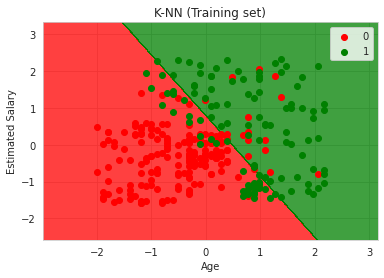

In [44]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# **Visualising the Test set results**

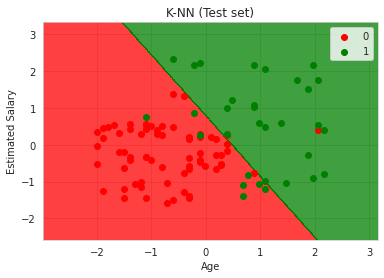

In [45]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# **Evaluate The Model**

In [46]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

**1. Classification Report**

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.92      0.75      0.83        32

    accuracy                           0.90       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.90      0.90      0.90       100



**Accuracy**

In [48]:
print(accuracy_score(y_test,y_pred))

0.9


## <font color='red'>**RBF SVM**

# **Fitting the model**

In [51]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state= 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

# **Predicting the Test set results**

In [53]:
y_pred = classifier.predict(X_test)

# **Confusion Matrix**

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[64  4]
 [ 3 29]]


# **Visualising the Training set results**

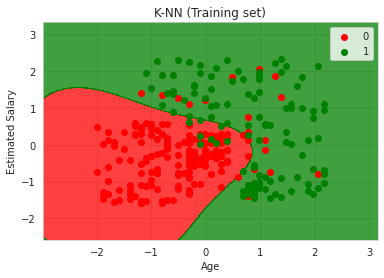

In [55]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# **Visualising the Test set results**

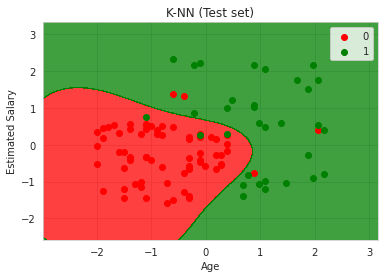

In [56]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# **Evaluate The Model**

In [57]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

**1. Classification Report**

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



**Accuracy**

In [59]:
print(accuracy_score(y_test,y_pred))

0.93


# **CONCLUSION :**

<B>The data visualization of the training set and test set is given above.<BR><BR>As in the svm the kernel was selected as linear, the graph is linear with a straight line whereas kerel svm deals with non-linear data, the graph is non-linear (curve).<BR><BR>The green dots shows the people buying the car whereas red dots shows the people not buying the car. <BR><BR>The green dots on the green region shows the true positive whereas the red dots on the red region shows the true negative.<BR><BR> The wrongly classified are the green dots in the red region (false negative) and the red dots in the green region (false positive).<br><br>

<font color = 'red'>From the two models, it is clear that for this dataset, the non-linear kernel (rbf) is better than the linear kernel svm as it predicts more accurately(93%) as against the linear SVM(90%) and the graph illustrates it clearly.